In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import numpy as np

In [2]:
diabetes_data=pd.read_csv('../datasets/diabetes.csv')

In [3]:
diabetes_data

Pregnencies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [26]:
x=diabetes_data.drop(['Outcome'],axis=1)

In [27]:
y=diabetes_data['Outcome']

In [28]:
model=LogisticRegression()

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [30]:
model.fit(xtrain,ytrain)

C:\Users\GF LAB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [32]:
y_pred=model.predict(xtest)

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       151
           1       0.70      0.53      0.60        80

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

confusion matrix: 



<Figure size 1500x700 with 0 Axes>

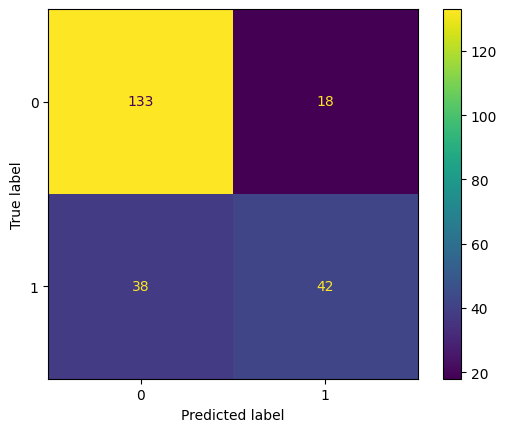

In [37]:
print(f'Classification Report: \n{classification_report(ytest,y_pred)}')
print(f'confusion matrix: \n')
plt.figure(figsize=(15,7))
cm=confusion_matrix(ytest,y_pred,labels=model.classes_)
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cmd.plot(colorbar=True)
plt.show()